<a href="https://colab.research.google.com/github/thatdudemihir/AWSGoat/blob/master/business_analytics_team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# /content/drive/MyDrive/UIUC - Assignments/Intro to Business Analytics/Team Project/ities.parquet
# /content/drive/MyDrive/UIUC - Assignments/Intro to Business Analytics/Team Project/max_temp.xz

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/UIUC - Assignments/Intro to Business Analytics/Team Project/ities.parquet'
dfi = pd.read_parquet(file_path)
print(dfi.info())
print(dfi.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438151 entries, 0 to 438150
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date               438151 non-null  object 
 1   OperationType      438151 non-null  object 
 2   CashierName        438151 non-null  object 
 3   LineItem           438151 non-null  object 
 4   Department         438151 non-null  object 
 5   Category           438151 non-null  object 
 6   RegisterName       438151 non-null  object 
 7   StoreNumber        438151 non-null  object 
 8   TransactionNumber  438151 non-null  object 
 9   CustomerCode       438151 non-null  object 
 10  Price              438139 non-null  float64
 11  Quantity           438151 non-null  int64  
 12  TotalDue           438139 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 43.5+ MB
None
        Date OperationType     CashierName                     LineItem  \
0  7/18/20

In [ ]:
dfw = pd.read_pickle("/content/drive/MyDrive/UIUC - Assignments/Intro to Business Analytics/Team Project/max_temp.xz")
print(dfw.info())
print(dfw.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Week          52 non-null     int64  
 1   Monday        52 non-null     float64
 2   Tuesday       52 non-null     float64
 3   Wednesday     52 non-null     float64
 4   Thursday      52 non-null     float64
 5   Friday        52 non-null     float64
 6   Saturday      52 non-null     float64
 7   Sunday        52 non-null     float64
 8   WeekStarting  52 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.8+ KB
None
   Week  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  \
0     1   46.94    44.96      41.00     44.96   59.00     57.02   57.02   
1     2   48.92    46.04      46.04     46.94   51.08     42.08   48.92   
2     3   48.02    51.98      53.06     55.04   50.00     51.08   50.00   
3     4   33.98    41.00      51.08     46.94   55.94     

In [ ]:
def simple_clean_and_report(df, name):
    if df is None:
        print(f"{name} not defined.")
        return df

    actions = []
    dfc = df.copy()

    # 1. Convert date/time columns
    for col in dfc.columns:
        if "date" in col.lower() or "time" in col.lower():
            try:
                dfc[col] = pd.to_datetime(dfc[col], errors="coerce")
                actions.append(f"Converted '{col}' to datetime")
            except Exception:
                pass

    # 2. Convert numeric-looking object columns
    for col in dfc.select_dtypes(include="object").columns:
        try:
            dfc[col] = pd.to_numeric(dfc[col], errors="ignore")
            if pd.api.types.is_numeric_dtype(dfc[col]):
                actions.append(f"Converted '{col}' to numeric")
        except Exception:
            pass

    # Show results
    print(f"\n=== INFO for {name} ===")
    print(dfc.info())
    print(f"\n=== FIRST 5 ROWS of {name} ===")
    print(dfc.head())

    # List what happened
    if actions:
        print("\nChanges made:")
        for a in actions:
            print("-", a)
    else:
        print("\nNo datatype changes were necessary.")

    return dfc

# Apply to your dataframes
try:
    dfi = simple_clean_and_report(dfi, "dfi (ities.parquet)")
except NameError:
    print("dfi not loaded yet")

try:
    dfw = simple_clean_and_report(dfw, "dfw (max_temp.xz)")
except NameError:
    print("dfw not loaded yet")


=== INFO for dfi (ities.parquet) ===


/tmp/ipython-input-1846624189.py:21: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dfc[col] = pd.to_numeric(dfc[col], errors="ignore")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438151 entries, 0 to 438150
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               438151 non-null  datetime64[ns]
 1   OperationType      438151 non-null  object        
 2   CashierName        438151 non-null  object        
 3   LineItem           438151 non-null  object        
 4   Department         438151 non-null  object        
 5   Category           438151 non-null  object        
 6   RegisterName       438151 non-null  object        
 7   StoreNumber        438151 non-null  object        
 8   TransactionNumber  438151 non-null  object        
 9   CustomerCode       438151 non-null  object        
 10  Price              438139 non-null  float64       
 11  Quantity           438151 non-null  int64         
 12  TotalDue           438139 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), 

/tmp/ipython-input-1846624189.py:21: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  dfc[col] = pd.to_numeric(dfc[col], errors="ignore")


In [ ]:
# Summary statistics for dfi
print("=== Summary Statistics: dfi (ities.parquet) ===")
print(dfi.describe(include="all"))
print("\n")

# Summary statistics for dfw
print("=== Summary Statistics: dfw (max_temp.xz) ===")
print(dfw.describe(include="all"))

=== Summary Statistics: dfi (ities.parquet) ===
                                 Date OperationType     CashierName  \
count                          438151        438151          438151   
unique                            NaN             2              56   
top                               NaN          SALE  Wallace Kuiper   
freq                              NaN        437802           79328   
mean    2015-07-11 03:19:15.177096704           NaN             NaN   
min               2014-01-04 00:00:00           NaN             NaN   
25%               2014-09-11 00:00:00           NaN             NaN   
50%               2015-06-26 00:00:00           NaN             NaN   
75%               2016-04-26 00:00:00           NaN             NaN   
max               2017-04-05 00:00:00           NaN             NaN   
std                               NaN           NaN             NaN   

                           LineItem Department                     Category  \
count               

In [ ]:
# --- CONFIG ---
DROP_HEAVY = True        # set False to impute everything
HEAVY_THRESH = 0.40      # drop rows where a column has >40% missing

def mode_or_nan(s):
    x = s.dropna()
    return x.mode().iloc[0] if not x.empty else np.nan

def fix_missing(df, name):
    print(f"=== Missing BEFORE: {name} ===")
    miss0 = df.isna().sum().to_frame("missing")
    miss0["%"] = (miss0["missing"]/len(df)*100).round(2)
    print(miss0[miss0["missing"]>0].sort_values("missing", ascending=False))

    out, notes = df.copy(), []
    n0 = len(out)
    for c in out.columns:
        m = out[c].isna().sum()
        if m == 0:
            continue
        pct = m/len(out)
        dt_before = out[c].dtype

        if DROP_HEAVY and pct > HEAVY_THRESH:
            rows_before = len(out)
            out = out.dropna(subset=[c])
            notes.append(f"{c}: {pct:.0%} missing → dropped {rows_before-len(out)} rows (dtype kept {dt_before}).")
            continue

        if pd.api.types.is_numeric_dtype(out[c]):
            val = out[c].median()
        elif pd.api.types.is_datetime64_any_dtype(out[c]):
            val = pd.to_datetime(out[c].dropna().view("int64").median()) if out[c].notna().any() else pd.NaT
        elif pd.api.types.is_bool_dtype(out[c]):
            val = mode_or_nan(out[c])
        else:
            val = mode_or_nan(out[c])

        out[c] = out[c].fillna(val)
        # ensure datetime stays datetime
        if "datetime64" in str(dt_before):
            out[c] = pd.to_datetime(out[c], errors="coerce")
        notes.append(f"{c}: imputed with {'median' if pd.api.types.is_numeric_dtype(out[c]) else 'mode/median'}; dtype now {out[c].dtype}.")

    print(f"\n=== Missing AFTER: {name} ===")
    miss1 = out.isna().sum().to_frame("missing")
    miss1["%"] = (miss1["missing"]/len(out)*100).round(2)
    print(miss1[miss1["missing"]>0].sort_values("missing", ascending=False))

    print(f"\n=== {name}.info() ===")
    print(out.info())

    print("\nNotes:")
    for n in notes: print("-", n)
    print(f"\nRows before: {n0} | after: {len(out)} | removed: {n0-len(out)}")
    return out

# Run on dfi (and dfw if you want similar handling)
dfi = fix_missing(dfi, "dfi")
# dfw = fix_missing(dfw, "dfw")  # uncomment if needed

=== Missing BEFORE: dfi ===
          missing    %
Price          12  0.0
TotalDue       12  0.0

=== Missing AFTER: dfi ===
Empty DataFrame
Columns: [missing, %]
Index: []

=== dfi.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438151 entries, 0 to 438150
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               438151 non-null  datetime64[ns]
 1   OperationType      438151 non-null  object        
 2   CashierName        438151 non-null  object        
 3   LineItem           438151 non-null  object        
 4   Department         438151 non-null  object        
 5   Category           438151 non-null  object        
 6   RegisterName       438151 non-null  object        
 7   StoreNumber        438151 non-null  object        
 8   TransactionNumber  438151 non-null  object        
 9   CustomerCode       438151 non-null  object        
 10  Price              

In [ ]:
# Ensure the Date column is in datetime format
dfi['Date'] = pd.to_datetime(dfi['Date'], errors='coerce')

# Aggregate Quantity and TotalDue at the daily level
dfid = (
    dfi.groupby(dfi['Date'].dt.date)[['Quantity', 'TotalDue']]
       .sum()
       .reset_index()
       .rename(columns={'Date': 'Date'})
)

# Display first 10 rows
print("=== First 10 rows of dfid ===")
print(dfid.head(10))

=== First 10 rows of dfid ===
         Date  Quantity  TotalDue
0  2014-01-04       593   6748.21
1  2014-01-06       345   7455.73
2  2014-01-07       410   5472.79
3  2014-01-08       413   4128.62
4  2014-01-09       420   5568.43
5  2014-01-10       656   6931.44
6  2014-01-11       695   7362.49
7  2014-01-13       270   3096.02
8  2014-01-14       404   4580.24
9  2014-01-15       632   8030.54


In [ ]:
# Convert from wide to long format
dfwd = pd.melt(
    dfw,
    id_vars=[col for col in dfw.columns if col not in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']],
    value_vars=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
    var_name='day',
    value_name='max_temp'
)

# Display first 10 rows
print("=== First 10 rows of dfwd ===")
print(dfwd.head(10))

=== First 10 rows of dfwd ===
   Week WeekStarting     day  max_temp
0     1     1/3/2016  Monday     46.94
1     2    1/10/2016  Monday     48.92
2     3    1/17/2016  Monday     48.02
3     4    1/24/2016  Monday     33.98
4     5    1/31/2016  Monday     51.08
5     6     2/7/2016  Monday     55.94
6     7    2/14/2016  Monday     48.92
7     8    2/21/2016  Monday     42.08
8     9    2/28/2016  Monday     44.96
9    10     3/6/2016  Monday     41.00


In [ ]:
# Ensure WeekStarting is datetime
dfwd['WeekStarting'] = pd.to_datetime(dfwd['WeekStarting'], errors='coerce')

# Map each day name to an offset from WeekStarting
day_offsets = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Create new Date column
dfwd['Date'] = dfwd['WeekStarting'] + dfwd['day'].map(day_offsets).astype('timedelta64[D]')

# Arrange in ascending order of Date
dfwd = dfwd.sort_values(by='Date').reset_index(drop=True)

# Show first 10 rows
print("=== First 10 rows of dfwd with Date ===")
print(dfwd.head(10))

=== First 10 rows of dfwd with Date ===
   Week WeekStarting        day  max_temp       Date
0     1   2016-01-03     Monday     46.94 2016-01-03
1     1   2016-01-03    Tuesday     44.96 2016-01-04
2     1   2016-01-03  Wednesday     41.00 2016-01-05
3     1   2016-01-03   Thursday     44.96 2016-01-06
4     1   2016-01-03     Friday     59.00 2016-01-07
5     1   2016-01-03   Saturday     57.02 2016-01-08
6     1   2016-01-03     Sunday     57.02 2016-01-09
7     2   2016-01-10     Monday     48.92 2016-01-10
8     2   2016-01-10    Tuesday     46.04 2016-01-11
9     2   2016-01-10  Wednesday     46.04 2016-01-12


In [ ]:
# Make sure Date columns are both datetime64[ns]
dfid['Date'] = pd.to_datetime(dfid['Date'])
dfwd['Date'] = pd.to_datetime(dfwd['Date'])

# Inner join on Date
df = pd.merge(dfid, dfwd, on="Date", how="inner")

# Sort by Date ascending
df = df.sort_values(by="Date").reset_index(drop=True)

# Display first 10 rows
print("=== First 10 rows of df (joined) ===")
print(df.head(10))

# Check structure
print("\nShape of df:", df.shape)
print("Column types:\n", df.dtypes)

=== First 10 rows of df (joined) ===
        Date  Quantity  TotalDue  Week WeekStarting        day  max_temp
0 2016-01-05       304   3358.45     1   2016-01-03  Wednesday     41.00
1 2016-01-06       357   3934.55     1   2016-01-03   Thursday     44.96
2 2016-01-07       389   5965.76     1   2016-01-03     Friday     59.00
3 2016-01-08       583   6192.91     1   2016-01-03   Saturday     57.02
4 2016-01-09       605   6857.24     1   2016-01-03     Sunday     57.02
5 2016-01-11       366   4076.70     2   2016-01-10    Tuesday     46.04
6 2016-01-12       319   3517.73     2   2016-01-10  Wednesday     46.04
7 2016-01-13       385   6276.86     2   2016-01-10   Thursday     46.94
8 2016-01-14       493   5031.85     2   2016-01-10     Friday     51.08
9 2016-01-15       604   6281.73     2   2016-01-10   Saturday     42.08

Shape of df: (311, 7)
Column types:
 Date            datetime64[ns]
Quantity                 int64
TotalDue               float64
Week                     int6

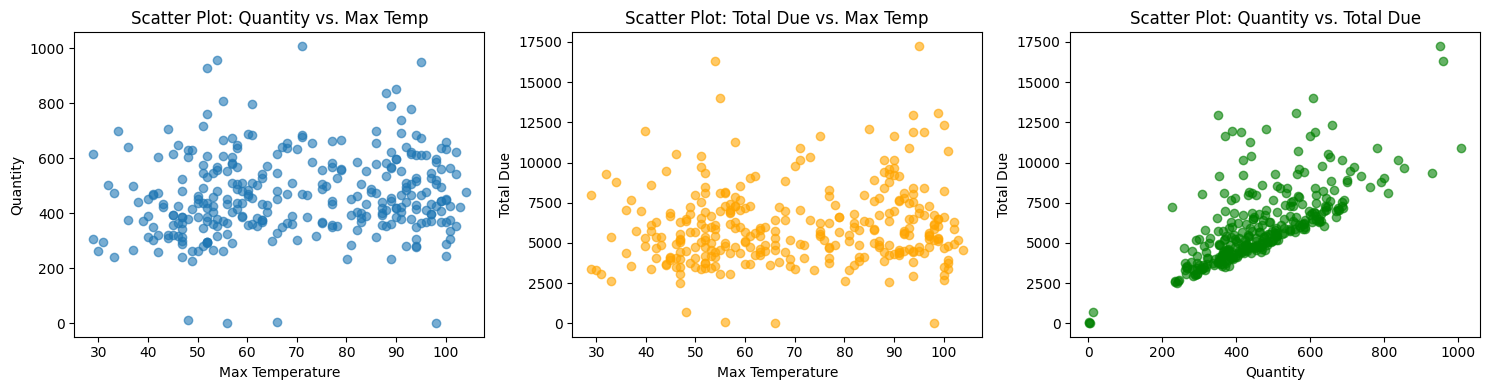

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

# 1. Quantity vs. max_temp
plt.subplot(1, 3, 1)
plt.scatter(df['max_temp'], df['Quantity'], alpha=0.6)
plt.xlabel('Max Temperature')
plt.ylabel('Quantity')
plt.title('Scatter Plot: Quantity vs. Max Temp')

# 2. TotalDue vs. max_temp
plt.subplot(1, 3, 2)
plt.scatter(df['max_temp'], df['TotalDue'], alpha=0.6, color='orange')
plt.xlabel('Max Temperature')
plt.ylabel('Total Due')
plt.title('Scatter Plot: Total Due vs. Max Temp')

# 3. Quantity vs. TotalDue
plt.subplot(1, 3, 3)
plt.scatter(df['Quantity'], df['TotalDue'], alpha=0.6, color='green')
plt.xlabel('Quantity')
plt.ylabel('Total Due')
plt.title('Scatter Plot: Quantity vs. Total Due')

plt.tight_layout()
plt.show()